In [1]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Multiple_Linear_Regression/50_Startups.csv')

In [3]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<BarContainer object of 3 artists>

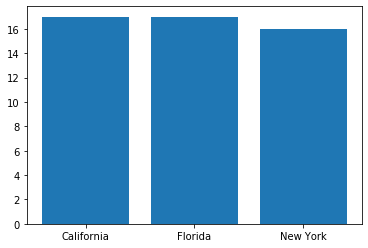

In [4]:
plt.bar(np.unique(dataset['State']), dataset['State'].value_counts())

In [5]:
X = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = dataset[['Profit']]


In [6]:
# Encoding categorical data
# Encoding the Independent Variable(State)
dummy_X = pd.get_dummies(dataset['State'])
dummy_X.head(5)

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [7]:
X = X.drop('State', axis=1)
X.head(5)

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [8]:
X = X.join(dummy_X)
X.head(5)

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [9]:
# Avoid the dummy variable trap 
# For this removing  the California column as shown in video
# The library used for the linear regression automatically handles for dummy variable trap and doesn't need this to be done.
# But this is needed for some libraries.
X = X.drop('California', axis=1)
X.head(5)

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Fitting the Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([[103015.20159796],
       [132582.27760816],
       [132447.73845174],
       [ 71976.09851258],
       [178537.48221055],
       [116161.24230165],
       [ 67851.69209676],
       [ 98791.73374687],
       [113969.43533012],
       [167921.0656955 ]])